# Interactive investigation of arrests dataset

Name: Simon Wally

Date: 10/26/2025

Content: The dataset represents data on convicted criminals leaving prison, having served their time, and whether they are likely to re-offend and to be arrested again within 12 months of release. The explanatory features in the data have been renamed and recoded so that privacy is maintained and the focus is on interpreting and using the data objectively. The (single) target is binary-valued, identifying whether a given instance will reoffend or not. This “grouping” aspect is indicated by a set of features sharing the same initial letter, e.g., features a1, a2, a3 and a4 all relate to a single grouped attribute, but have meaning by themselves too.

 

## 1. Introduction


The aim of the notebook is to find and identify patterns, relationships and predictors of reoffending. 

- EDA Pass 1 &rarr; Data overview and cleaning 
- EDA Pass 2 &rarr; Feature-level exploration
- EDA Pass 4 &rarr; Relationship and correlation exploration

## 2. EDA Pass 1

### 2.1 Load and inspect data

In [87]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import ipywidgets as widgets
import phik 

Import libraries pandas, matplotlib, seaborn, and ipywidgets for data visualisation. 

In [88]:
df = pd.DataFrame(pd.read_csv('data/arrests.csv', sep='\t'))
df.head()

,tgt,a1,a2,a3,a4,b,c1,c2,c3,d1,...,d3,d4,d5,e1,e2,f1,f2,g,h,i
0,n,6.02,s,NaN,n,f,d,c,w,4.80,...,NaN,s,w,NaN,NaN,f,f,NaN,l,a
1,y,5.88,x,s,r,t,s,d,r,6.11,...,r,y,w,NaN,NaN,f,f,NaN,d,u
2,n,10.05,x,t,n,t,p,NaN,n,8.66,...,NaN,NaN,n,NaN,w,t,p,NaN,d,a
3,y,7.28,f,t,y,f,x,c,y,4.55,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
4,y,2.01,p,t,n,f,a,c,n,6.69,...,NaN,t,y,NaN,NaN,t,e,NaN,m,a


We loaded the data from the csv in a pandas dataframe to work with it. We printed the first 5 lines to get a good overview of the data.

In [89]:
df.dtypes

tgt     object
a1     float64
a2      object
a3      object
a4      object
b       object
c1      object
c2      object
c3      object
d1     float64
d2     float64
d3      object
d4      object
d5      object
e1      object
e2      object
f1      object
f2      object
g       object
h       object
i       object
dtype: object

We printed column with its datatype to get an overview over the columns in the dataframe. We can count 18 category-Datatypes and 3 numerical datatypes in form of a floating point number. The objects are probably categories. For example for the first row there are two values, the values 'y' and 'n', for reoffended or not. 

In [90]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype == 'float64']

We grouped together the columns with a object as a datatype and the numerical columns in two different arrays. So we can access them separately later. 

In [91]:
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

To improve the ease of use in later processing of the data we converted the columns with datatype *object* to the datatype *category*.

### 2.2 Check for missing values

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60458 entries, 0 to 60457
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   tgt     60458 non-null  category
 1   a1      60458 non-null  float64 
 2   a2      60458 non-null  category
 3   a3      46485 non-null  category
 4   a4      60458 non-null  category
 5   b       60458 non-null  category
 6   c1      50676 non-null  category
 7   c2      35649 non-null  category
 8   c3      60458 non-null  category
 9   d1      60458 non-null  float64 
 10  d2      60458 non-null  float64 
 11  d3      9433 non-null   category
 12  d4      22713 non-null  category
 13  d5      60458 non-null  category
 14  e1      3142 non-null   category
 15  e2      7335 non-null   category
 16  f1      60458 non-null  category
 17  f2      58007 non-null  category
 18  g       6292 non-null   category
 19  h       60458 non-null  category
 20  i       60458 non-null  category
dtypes: category(

 We can also see the number of rows which is 60458 and for every columns how many non-null values there are. We can see that 12 rows have no null-values. The rows d3, e1, e2, and g have less than 10.000 non-null values which could a problem for using them for a valid prediction for the target value. 

In [93]:
MISSING_THRESHOLD = 0.7

missing_values = (
    df.isnull()
    .sum()
    .to_frame("MissingCount")
    .assign(MissingProportion = lambda x: 100 * x["MissingCount"] / len(df))
    .sort_values("MissingProportion", ascending=False)
)

missing_values["Usable"] = missing_values["MissingProportion"] <= (MISSING_THRESHOLD *100)
missing_values["Datatype"] = df.dtypes.reindex(missing_values.index).astype(str)

print(missing_values)







     MissingCount  MissingProportion  Usable  Datatype
e1          57316          94.803004   False  category
g           54166          89.592775   False  category
e2          53123          87.867611   False  category
d3          51025          84.397433   False  category
d4          37745          62.431771    True  category
c2          24809          41.035099    True  category
a3          13973          23.111912    True  category
c1           9782          16.179827    True  category
f2           2451           4.054054    True  category
a4              0           0.000000    True  category
a2              0           0.000000    True  category
a1              0           0.000000    True   float64
tgt             0           0.000000    True  category
d1              0           0.000000    True   float64
d2              0           0.000000    True   float64
b               0           0.000000    True  category
c3              0           0.000000    True  category
f1        

We decided that the Features we use should not have more than 70 percent of missing values. Columns with more than 70 % of missing values will be dropped. That's why we created a new table which shows us the amount of missing values per Feature and added the proportion in percent. The Usable Flag shows us if the Feature is usable for the eda. If more than 30 percent of the Feature are missing values we do not use it. We also looked at the datatype. If there would be any numeric non usable Features we could take the average or mean value for the missing value. But all numeric values are complete.

In [94]:
usable_cols = missing_values[missing_values["Usable"]].index.tolist()
unusable_cols = missing_values[~missing_values["Usable"]].index.tolist() 
df_usable = df[usable_cols].copy()
print(usable_cols)
print(unusable_cols)

cat_usable_col = [c for c in df_usable.columns if c in cat_col]
num_usable_col = [c for c in df_usable.columns if c in num_col]
print(cat_usable_col)
print(num_usable_col)

['d4', 'c2', 'a3', 'c1', 'f2', 'a4', 'a2', 'a1', 'tgt', 'd1', 'd2', 'b', 'c3', 'f1', 'd5', 'h', 'i']
['e1', 'g', 'e2', 'd3']
['d4', 'c2', 'a3', 'c1', 'f2', 'a4', 'a2', 'tgt', 'b', 'c3', 'f1', 'd5', 'h', 'i']
['a1', 'd1', 'd2']


For a good overview we created two arrays with usable and unusable cols. We also created a new dataframe with only usable values.

In [95]:
ROWMISSING_THRESHOLD = int(len(df.columns) / 2)
row_missing = df_usable.isnull().sum(axis=1)
incomplete_rows = row_missing[row_missing > ROWMISSING_THRESHOLD].index.tolist()
print(incomplete_rows)


[]


Now we checked if there are any rows which have more then half of the columns with missing values. This is not the case so we do not have to drop any rows completely. In the next step we will look in the columns where values are missing. 

In [96]:
for cat in cat_usable_col:
    print(f"{cat}: {df_usable[cat].isnull().sum()}")

d4: 37745
c2: 24809
a3: 13973
c1: 9782
f2: 2451
a4: 0
a2: 0
tgt: 0
b: 0
c3: 0
f1: 0
d5: 0
h: 0
i: 0


In a3 are missing 13973 values and in c1 are missing 9755 values. Later when we look at the distribution we can see if we just drop these rows or if there is a majority value in this feature we give them the category of this most occurring value. 

In [97]:
print(f"Duplicated rows: {df_usable.duplicated().sum()}")
df_usable = df_usable.drop_duplicates(keep='first')



Duplicated rows: 142


We checked for duplicated rows. Because with 20 columns the likelihood of true duplicate lows is low. We see that there are 142 duplicate rows. We drop all the duplicates but we leave the first occurrence of this observation in the dataframe. 

### 2.3 Discussion

The first stage, the EDA Pass 1, focused on assessing the quality and the structure of the dataset. The dataset was loaded into a pandas dataframe and examined to understand the dimensions and get to know the columns and its datatypes. The columns were than separated into numerical and categorical groups to examine them later by themself. To improve the ease of use in further processing of the dataset all object datatypes were converted to categorical datatypes.

The dataframe was checked for missing values in all columns. Columns with more than 70% of missing values were dropped. 4 columns had to be dropped, all were part of the categorical group. The remaining columns were copied in a dataframe with only usable features. Additionally the rows were checked, if there are specific rows with a lot of missing values. There could not be found any rows with more than half of the entries missing, so no rows were dropped. Because only categorical values were missing, we don't have to substitute values. If there were numerical values missing we would substitute them with the average for example.
The dataframe was also checked for duplicate entries, ensuring that repeated records did not bias the analysis. 142 duplicate values were found. The duplicate values were dropped and only the first occurrence of it was kept in the dataset.

Overall, the ED1 analysis established  a clean dataset for further exploratory. Only usable variables are in the dataset. The next stage is the EDA Pass 2. Here we review each features individually and check if they're relevant for further analysis and to predict the target variable. 

## 3. EDA Pass 2

### 3.1 Feature types 

In [98]:
df_usable.head()

,d4,c2,a3,c1,f2,a4,a2,a1,tgt,d1,d2,b,c3,f1,d5,h,i
0,s,c,NaN,d,f,n,s,6.02,n,4.80,8.11,f,w,f,w,l,a
1,y,d,s,s,f,r,x,5.88,y,6.11,14.40,t,r,f,w,d,u
2,NaN,NaN,t,p,p,n,x,10.05,n,8.66,17.98,t,n,t,n,d,a
3,NaN,c,t,x,f,y,f,7.28,y,4.55,13.73,f,y,f,y,d,a
4,t,c,t,a,e,n,p,2.01,y,6.69,2.46,f,n,t,y,m,a


### 3.2 Explore target 

In [99]:
df_usable['tgt'].unique()


['n', 'y']
Categories (2, object): ['n', 'y']

We can see that the target variable is a binary categorical variable . 'y' for reoffended and 'n' for not reoffended. 

In [100]:
df_usable['tgt'].isnull().sum()

np.int64(0)

The target is complete, so every row in the dataset has a corresponding target variable and there are no missing values

In [101]:
df_usable['tgt'].describe()

count     60316
unique        2
top           y
freq      33400
Name: tgt, dtype: object

Here we can see that there are 60316 observations with two unique categories and the most frequent category is 'y' with 33400 observations. We'll explore this in the next step further.

In [102]:
tgt_valueCounts = df_usable['tgt'].value_counts().rename_axis('tgt').reset_index(name='count')
tgt_valueCounts['percent'] = (df_usable['tgt'].value_counts(normalize=True) * 100).values
tgt_valueCounts['percent'] = tgt_valueCounts['percent'].round(2)
tgt_valueCounts

,tgt,count,percent
0,y,33400,55.38
1,n,26916,44.62


Here we can see the distribution of the target variable. It's 55.38% for 'y' and 44,62% for 'n' which is a relatively balanced distribution considering the optimal is a 50:50 distribution. 

<Axes: xlabel='tgt', ylabel='count'>

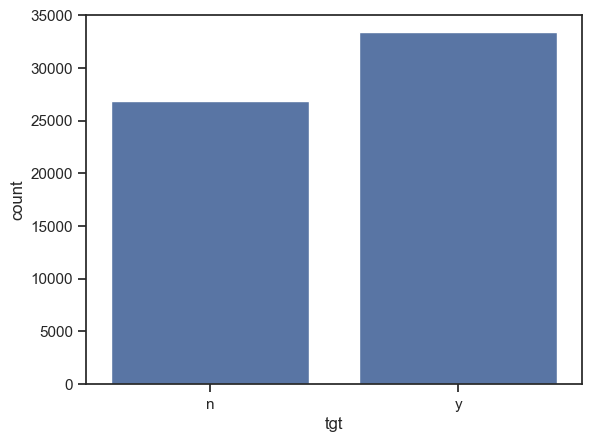

In [103]:
sns.countplot(x='tgt', data=df_usable)


Here is a visualization of the distribution of the target. Although there are slightly more 'y'-Values, it is still balanced.

### 3.3 Explore categorical variables

In [104]:
for cat in cat_usable_col:
    print(f"{cat}: {df_usable[cat].isna().sum()}")

d4: 37743
c2: 24808
a3: 13973
c1: 9755
f2: 2451
a4: 0
a2: 0
tgt: 0
b: 0
c3: 0
f1: 0
d5: 0
h: 0
i: 0


Here we can see the amount of missing values in the categorical variables. In the further analysis we will just ignore the missing values. 

##### 3.3.1 Helper Functions

In [105]:
def doDistributionTable(df, col:str):
    valueCounts = df[col].value_counts().rename_axis(col).reset_index(name='count')
    valueCounts['percent'] = (df[col].value_counts(normalize=True) * 100).values
    valueCounts['percent'] = valueCounts['percent'].round(2)
    return valueCounts


This is a function to create a distribution table from a column in a dataframe. It shows the relative numbers and the proportions in percent for an exact analysis.

In [106]:
def doCountplot(column, hue=None):
    if hue:
        p=sns.countplot(data=df_usable, x=column, hue=hue)
    else:
        p=sns.countplot(data=df_usable,x=column )

This is a function to create a Countplot for a column. It is used for categorical columns to see the distribution of it. Optionally there can be added the hue parameter to plot another dimension. This is used to plot it relative to the target outcome. 

In [107]:
def doCrossTab(column, index):
    p= pd.crosstab(columns=df_usable[column], index=df_usable[index], margins=True, normalize='columns').style.format("{:.2%}").background_gradient(cmap='summer_r')
    display(p)

This is a function to create a CrossTab. It is used to compare two categorical features. In this case a feature is compared with the target to see the relationship in detailed percentages for every value of the feature. 

##### 3.3.2 Distribution analysis

In [108]:
exTgt = [col for col in cat_usable_col if col != 'tgt']

ddCol = widgets.Dropdown(options=exTgt, value=exTgt[0], description="Column")

uiControls = widgets.HBox([ddCol])

def doCoutplotAll(x):
    p=sns.countplot(data=df, x = x)


out = widgets.interactive_output(lambda column: doCountplot(df[column]), {"column":ddCol})
display(uiControls, out)


Output()

This gives a quick overview of the distribution for each categorical feature. 
The following observations can be made for each feature:

- Features d4, a3, c1, c3, i, a2 : The countplot shows that the observations are evenly distributed across the categories, so that the feature is likely useful for modeling. 
- Feature c2: The majority of observations in feature d4 belong to category c, followed by d and f. The distribution is slightly unbalanced, so you could consider aggregating categories d and f to simplify the feature. However, since the imbalance is not severe, the feature can still be used in its current form for modeling.
- Feature a4: The countplot shows a balanced distribution across the 12 categories. Except in category *n* are far more observations than in all other categories. Because the other values are well balanced the feature seems still useful for modeling. 
- Feature b, f1: These feature are both binary and look similar. The *f* value contains most of the observations. It is unbalanced but because the feature is binary, it can be valuable for modeling. 
- Feature h: The feature contains one category *h* which contains most observations and the categories *g,h,l,* and *m* which are nicely balanced. The last three categories *p,u,* and *w* contain only a few observations. You could **drop** or **aggregate** the last three categories because of the few values they contain.  
- Feature d5: The feature has many different categories (13). The categories *n, w,* and *y* are three categories which contain the most observation. The rest of the categories contain only a few observation. So it could be an option to **aggregate** them to improve the feature.  
- Feature f2: The countplot shows that 82.51% of the observations (see table below) are in category *f* and the rest of the observations is scattered across 7 other categories. In the following step we improve the feature by **aggregating** categories with few observation. 



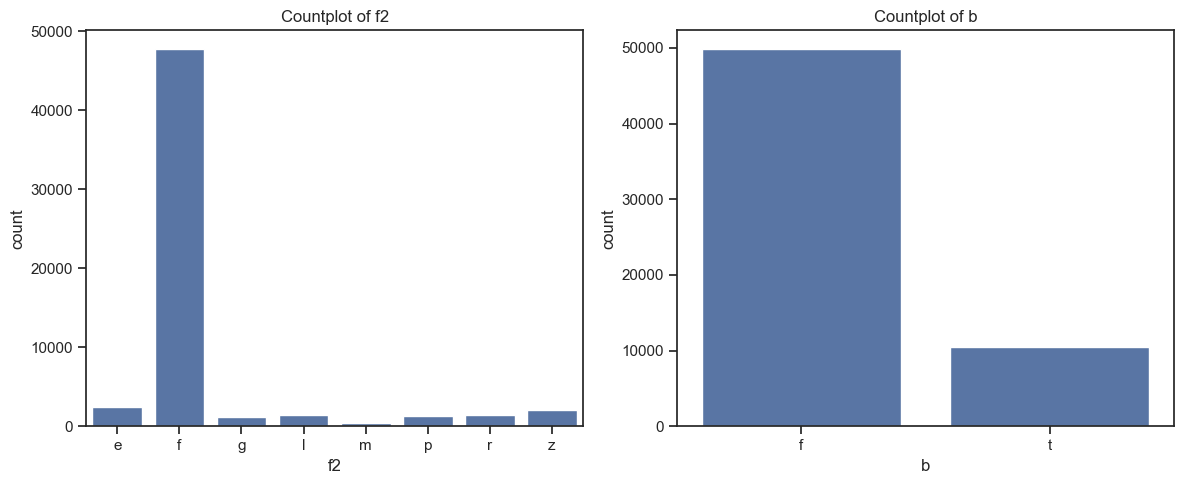

  f2  count  percent
0  f  47745    82.51
1  e   2408     4.16
2  z   2091     3.61
3  l   1414     2.44
4  r   1376     2.38
5  p   1254     2.17
6  g   1228     2.12
7  m    349     0.60

    b  count  percent
0  f  49827    82.61
1  t  10489    17.39


In [109]:
fig, axes = plt.pyplot.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=df_usable['f2'], ax=axes[0])
axes[0].set_title('Countplot of f2')

sns.countplot(x=df_usable['b'], ax=axes[1])
axes[1].set_title('Countplot of b')

plt.pyplot.tight_layout()
plt.pyplot.show()
print(doDistributionTable(df_usable, 'f2'))
print(f"\n {doDistributionTable(df_usable, 'b')}")



The feature *"f2"* has 8 different categories but is dominated by one single category (*"f"* with 82,51%). This shows low value for further predictions. Feature *"b"* has also one value with 82% but it is binary so it still has value for further predictions and should not be dropped. 

We can transform the feature *"f2"* to a binary feature, by aggregating all categories except f to a new category called *Others*. We will do this in the following step. 

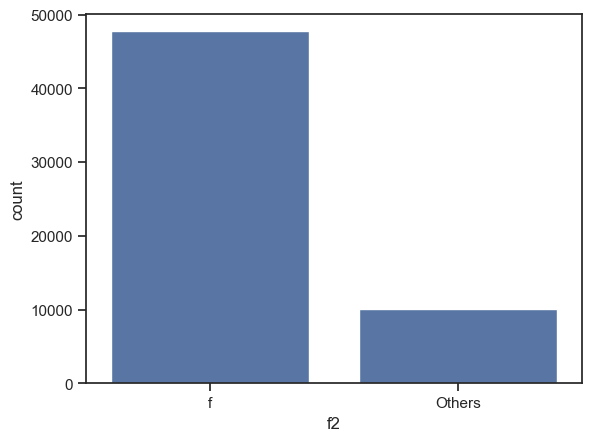

In [110]:
df_usable['f2'] = df_usable['f2'].apply(lambda x: 'f' if x == 'f' else 'Others')
doCountplot(df_usable.f2)


We aggregated all categories except f to the category *Others* so we have a binary feature. Now we can keep this feature and add it to the dataframe for further analysis. The aggregated f2 feature shows more value for further predictions. 

##### 3.3.3 Comparing features with target

In [111]:

excludeTgt_cat_usable_col = [col for col in cat_usable_col if col != 'tgt']

ddCol = widgets.Dropdown(options=excludeTgt_cat_usable_col, value=excludeTgt_cat_usable_col[0], description="Column")
uiControls = widgets.HBox([ddCol])

out1 = widgets.interactive_output(doCountplot, {"column":ddCol, "hue":widgets.fixed("tgt")})
out2 = widgets.interactive_output(doCrossTab, {"column":ddCol, "index":widgets.fixed("tgt")})
out1.layout = widgets.Layout(width='50%', border='1px solid #ccc', padding='10px')
out2.layout = widgets.Layout(width='50%', margin='155px')
display(uiControls, widgets.HBox([out1, out2]))

This plot shows a countplot and a catplot next to each other. Both compare each feature to the target variable. 

We observe the following relationships:


- Feature a3: The plot shows that most categories  do not have a clear association with one target class, but there are categories which do. Especially g, s, and t have a clear association and are likely to be valuable for prediction. Overall the feature seems **partly valuable for prediction**
- Feature c1, c2, c3, d4, d5, i: Every category is associated to different target values. The feature is likely to be **valuable for prediction.**
- Feature a4: Most categories are associated to different target values. The category g and w have no clear association. But still the feature is likely to be **partly valuable for prediction.**
- Feature a2: Most categories are associated to different target values. The category x and f have no clear association. But still the feature is likely to be **partly valuable for prediction.**
- Feature h: Most categories are associated to different target values. The category m has no clear association. As mentioned before the feature is unbalanced. But still the feature is likely to be **partly valuable for prediction.**
- Feature b, f1, f2 : The features are similar again when looking at the target relationship. Their f and t values are both slightly associated to the target value y, which brings **low value for modeling**. 


### 3.4 Explore numerical variables

In [112]:
for num in num_col:
    print(f" {num}: {df_usable[num].describe()}")

 a1: count    60316.000000
mean         6.740776
std          5.267438
min          0.380000
25%          3.490000
50%          5.880000
75%          8.550000
max         62.340000
Name: a1, dtype: float64
 d1: count    60316.000000
mean         6.594775
std          3.356442
min          0.000000
25%          4.650000
50%          5.960000
75%          7.750000
max         33.920000
Name: d1, dtype: float64
 d2: count    60316.000000
mean        12.173028
std         10.020931
min          0.000000
25%          5.250000
50%         10.210000
75%         16.580000
max        103.910000
Name: d2, dtype: float64




- **Feature a1:** 
  - Mean = 6.74, Std = 5.27 -> moderate spread of values.
- **Feature d1:**
  - Mean = 6.59, Std = 3.36 -> smaller spread than a1.
- **Feature d2:**
  - Mean = 12.17, Std = 10.02 -> wide variability among observations.
  - Range: 0 – 103.91 -> strong presence of high outliers.


##### 3.4.1 Helper Functions

In [113]:
def doHistplot(x, hue=None):
    if hue:
        sns.histplot(data= df,x= x,hue=hue, kde=True)
    else:
        sns.histplot(data= df,x= x, kde=True)

In [114]:
def doBoxplot(x, target=None):
    if target:
        sns.boxplot(data=df, x=target, y= x)
    else:
        sns.boxplot(data=df, x=x,)

In [115]:
def doCatplot(feature, target, kind, hue =None):
    if hue:
        sns.catplot(data=df,x=target,y=feature, kind=kind, hue= hue)
    else:
        sns.catplot(data=df,x=target,y=feature, kind=kind)

##### 3.4.2 Distribution analysis

In [116]:
ddCol = widgets.Dropdown(options=num_col, value=num_col[0], description="Column")

uiControls = widgets.HBox([ddCol])

out1 = widgets.interactive_output(doHistplot, {"x":ddCol})
out2 = widgets.interactive_output(doBoxplot, {"x":ddCol})

out1.layout = widgets.Layout(width='50%', border='1px solid #ccc', padding='10px')
out2.layout = widgets.Layout(width='50%', border='1px solid #ccc', padding='10px')
display(uiControls, widgets.HBox([out1, out2]))

- **Feature a1**: 
    - Distribution: slightly right-skewed
    - moderate spread of values 
    - **valuable**
- **Feature d1**:
    - Distribution: roughly symmetric but contains a spike at zero
    - **valuable,  zeros values might have a specific meaning** (see below further analysis) 
- **Feature d2**:
    - Distribution: right-skewed, many high outliers 
    - **scaling of transformation might be good before modeling**


##### 3.4.3 Comparing features with target

In [117]:
ddCol = widgets.Dropdown(options=num_col, value=num_col[0], description="Column")

uiControls = widgets.HBox([ddCol])

out1 = widgets.interactive_output(doHistplot, {"x":ddCol, "hue":widgets.fixed("tgt")})
out2 = widgets.interactive_output(doBoxplot, {"x":ddCol, "target":widgets.fixed("tgt")})
out1.layout = widgets.Layout(width='50%', border='1px solid #ccc', padding='10px')
out2.layout = widgets.Layout(width='50%', border='1px solid #ccc', padding='10px')
display(uiControls, widgets.HBox([out1, out2]))

Here we use the distribution of the numerical features to compare them with the target values

- **Feature a1:**
    - The plots show that lower values of the feature a1 are  more associated to the target value y. In the boxplot you can see that there are many outliers with extreme high values which are associated with the target value n. In the next plot we see this in more detail. 
- **Feature d1:**
    - The plots show that lower values are associated to the target value y. Although it is less clear here than in the feature a1. In both plots you can see a high amount of outliers which are associated to the target value n. We can also see a lot of outliers which are all 0 and associated with the target value y. It is unclear if the 0 value represents an error in the data or if it is a clear sign for the target prediction. 
- **Feature d2:**
    - Similar to the features a1 and d1 the plots show that lower values are associated to the target value y. We can see a lot of outliers with low values (slightly above 0) which are associated with the target value y. This looks similar to the feature d1, and be valuable for prediction. 



In [118]:
ddCol = widgets.Dropdown(options=num_col, value=num_col[0], description="Column")
kind= ['strip','point', 'bar']
ddKind = widgets.Dropdown(options=kind, value=kind[0], description="Kind")
uiControls = widgets.HBox([ddCol, ddKind])

out1 = widgets.interactive_output(doCatplot, {"feature":ddCol, "target":widgets.fixed("tgt"), "kind":ddKind})
display(uiControls, widgets.HBox([out1]))

Here is a Catplot which compared the features in three different kinds of plots:

- **Kind: Strip**
    - **Feature a1:** The values associated with the target category n appear to form two distinct groups (one below 30 and one above 40) with a noticeable gap between 30 and 40 where no observations are recorded. The reason for this gap is unclear, but it could reflect a genuine real-world phenomenon, indicating that values in this range simply do not occur in the population. Additionally, all values above 40 are exclusively associated with the target n, suggesting a clear subgroup within the data. This pattern makes the feature potentially valuable for predicting the target variable.
    - **Feature d1, d2:** Both plots show in a clear way higher values are associated with the target value n. In feature d1 it starts at values above 20 and in feature d2 it starts with values above 60. 
- **Kind: Point, Bar**
    - For all three features the plots show in average lower values are associated with the target value y and higher values with the target n. 


### 3.5 Discussion

The second stage, the EDA Pass 2, focused on the individual features and the target. We checked the distributions of the target and all the features. The feature f2 was the only feature which was strongly unbalanced so we aggregated the categories with only a few values. In the next step we examined each categorical feature in relation to the target values. All categories of the features c1, c2, c3, d4, d5, i were valuable for prediction. For the features a4,a3, a2, and h most categories were valuable for prediction. The features b, f1, and f2 are valuable for prediction but both are very similar. So one of them could be dropped. We could say that the features c1, c2, c3, d4, d5, i are best for predictions. 
Next we checked the numerical features. Feature a1 and d1 were similar to a normal distribution. Feature d1 and d2 had a many outliers, for example d1 had many 0 values associated to the target value y and d2 many low values associated to the target value y. We could also see that the feature a1 has a separated group of high values (above 40) which all are associated to the target value n. 

All in all the EDA Pass 2 gave a good overview over the single features and showed some interesting insights about some features. In the next step the EDA Pass 3 we will compare features to each other and look at correlations between the features. 

## 4. EDA Pass 3

### 4.1 Explore numerical features 

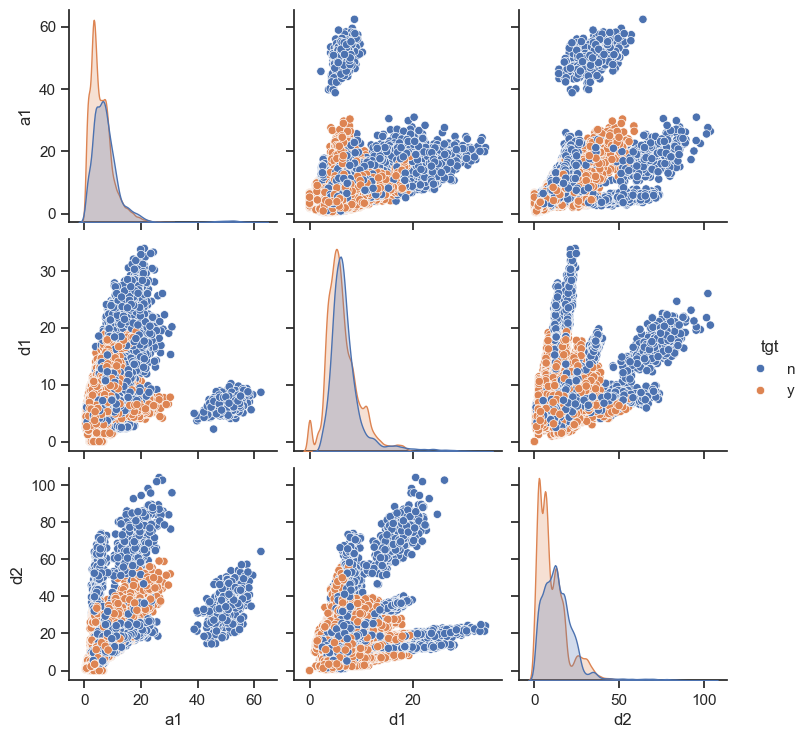

In [119]:
cols = ['a1', 'd1', 'd2', 'tgt'] 
df_pairplot = df_usable[cols]


sns.set_theme(style="ticks")
sns.pairplot(df_pairplot, hue="tgt")


plt.pyplot.show()

In this plot, we visualized all numerical features against each other, with the target values represented by different colors. In the first row, we can see a distinct group of high a1 values that are associated with the target value n. In the second and third rows, we observe that high d1 and d2 values are also associated with the target value n. This could mean that the features represent a score. People with high results in this score seem to offend less. The question remains why there there is a gap between 30 and 40 for feature a1.

### 4.2 Correlation analysis

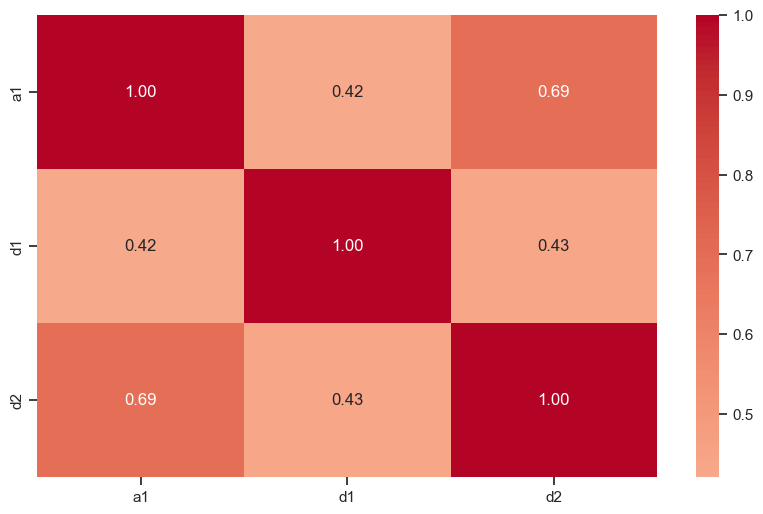

In [120]:
num_df = df_usable[num_usable_col]
corr_matrix = num_df.corr()


plt.pyplot.figure(figsize=(10, 6))
ax = sns.heatmap( corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center = 0)


plt.pyplot.show()


The heatmap illustrates the similarity between the numerical features, with all correlations exceeding 0.5. The strongest correlation occurs between a1 and d2. All in all d1 and d2 look both valuable for modeling. For a1 still remains the question of the gap ant it is correlated to d2 which could lead to a bit of redundancy. 

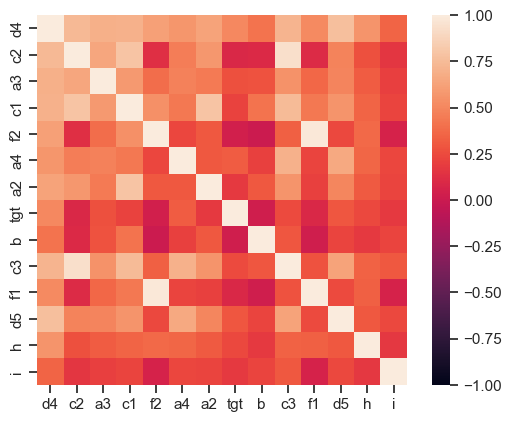

In [121]:



corr= df_usable[cat_usable_col].phik_matrix()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, square=True, vmin= -1, vmax=1)
plt.pyplot.show()




This heatmap shows the correlation between categorical features. We used a phi-k correlation analysis to get the correlation values of categorical values. We can see that features within one group tend to have a higher correlation (e.g. f1, f2 or c1, c2, c3). Although the features b, f1, and f2 are so  similar when looking at their countplots, b is not correlated to f1 and f2. That means we should only drop one of the features of f but not b because of redundancy. In the next step we will explore this further when we look at correlations among the individual groups. 



### 4.3 Relationship between grouped features

In [122]:
group_a = [col for col in df_usable.columns if 'a' in col]
group_c = [col for col in df_usable.columns if 'c' in col]
group_d = [col for col in df_usable.columns if 'd' in col]
group_f = [col for col in df_usable.columns if 'f' in col]
group_a.sort()
group_c.sort()
group_d.sort()
group_f.sort()

print(group_a)
print(group_c)
print(group_d)
print(group_f)



['a1', 'a2', 'a3', 'a4']
['c1', 'c2', 'c3']
['d1', 'd2', 'd4', 'd5']
['f1', 'f2']


We did a Phi-k correlations analysis to analyze the similarity of the grouped features. We used the Phi-k correlation because we can mix categorical features and numerical features in the correlation analysis. The heatmaps show the similarities among each group. The values lie between 0 and 1 with values near zero indicating no relation. 

Group a 

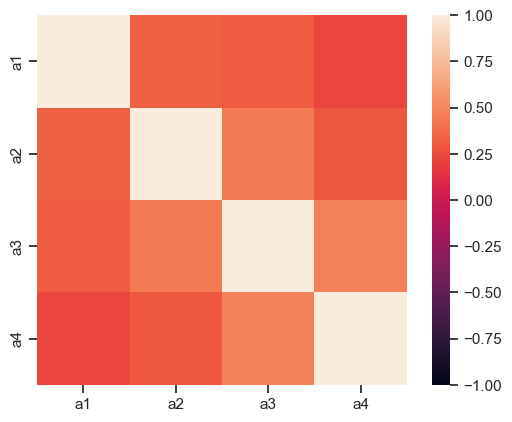

In [123]:


corr = df_usable[group_a].phik_matrix(interval_cols=['a1'])
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, square=True, vmin= -1, vmax=1)
plt.pyplot.show()


We can see that the features in group a are not strongly correlated. The highest correlation occurs between a2 and a3, but the value remains below 0.5, indicating only a weak relationship. From the previous individual analyses, we observed that most categories within the a-group still provide useful predictive information. Therefore, while group a may not be the most powerful set of features for prediction, it remains usable.

Group c 

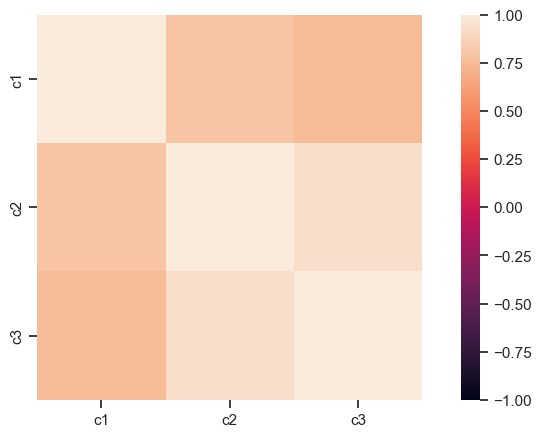

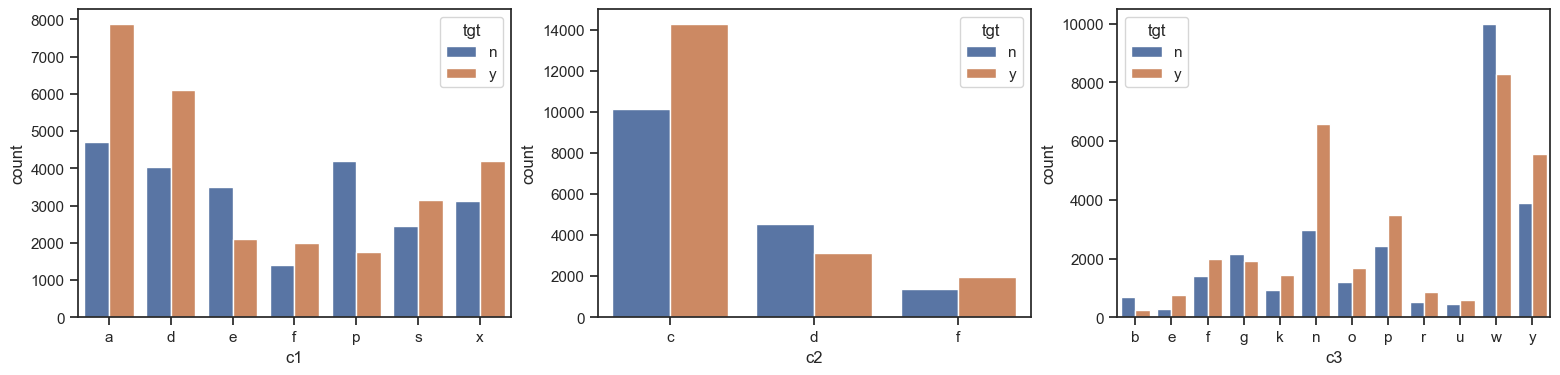

In [124]:

fig, ax = plt.pyplot.subplots(1, 1, figsize=(10, 5))

corr = df_usable[group_c].phik_matrix()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, square=True, vmin= -1, vmax=1)
plt.pyplot.show()

fig, axs = plt.pyplot.subplots(1, 3, figsize=(19,4))
c_col=['c1', 'c2', 'c3']
for k, c in enumerate(c_col):
    sns.countplot(data=df_usable, x=c, ax= axs[k], hue="tgt")
    axs[k].set_xlabel(c)
plt.pyplot.show()


We can see that the features in group c are highly correlated with each other. This suggests that they contain similar information, so using all of them in the model would introduce redundancy. The strongest correlation is observed between c2 and c3. For modeling, it would be better to keep only one of them. Typically the feature with fewer categories is used, as it is simpler and tends to improve model interpretability and performance. As we mentioned before c2 is a valuable predictor, because all categories are clearly associated to different target values. 

Group d

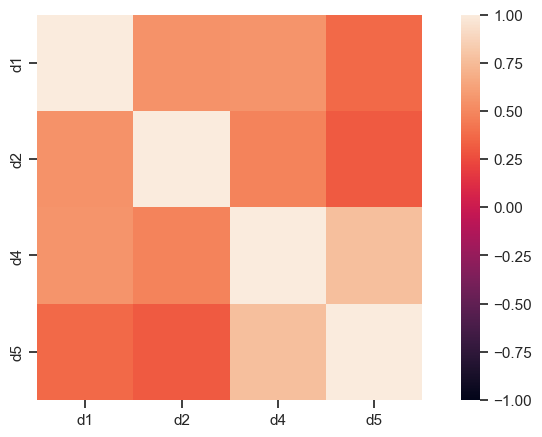

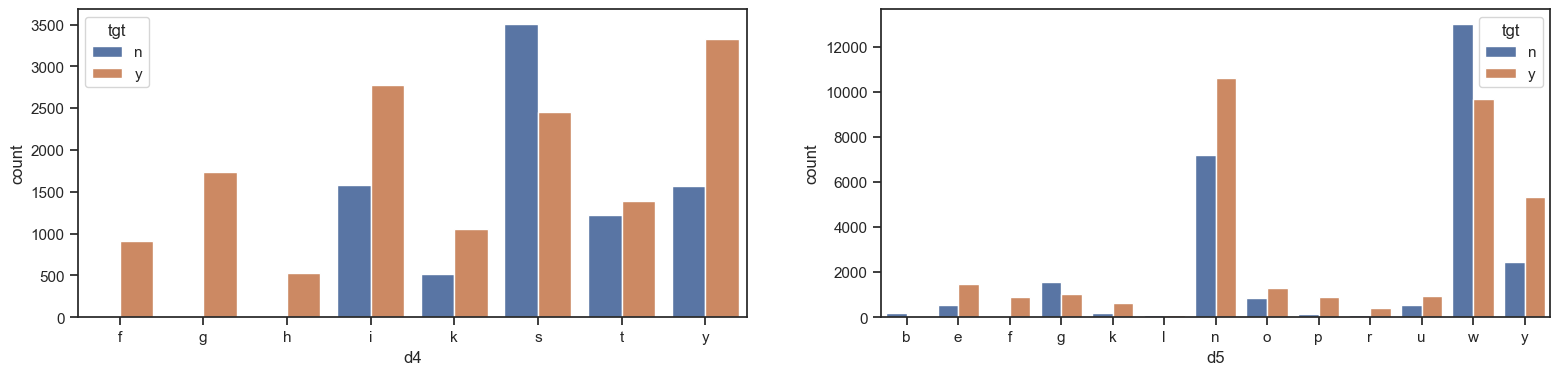

In [125]:


fig, ax = plt.pyplot.subplots(1, 1, figsize=(10, 5))
                              
                              
corr = df_usable[group_d].phik_matrix(interval_cols=['d1','d2'])
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, square=True, vmin= -1, vmax=1)
plt.pyplot.show()

fig, axs = plt.pyplot.subplots(1, 2, figsize=(19,4))
d_col = [ 'd4', 'd5']
for k, c in enumerate(d_col):
    sns.countplot(data=df_usable, x=c, ax= axs[k], hue="tgt")
    axs[k].set_xlabel(c)
plt.pyplot.show()


The features in group d are not as strongly correlated as those in group c. The strongest relationship within this group is observed between d5 and d4. As seen earlier in the bar plot, both features provide valuable predictive information, however, d4 is better than d5 for modeling. This is because d4 has fewer categories and shows a 100% association with the target value (y) for categories f, g, and h which makes it very suitable for modeling.

Group f

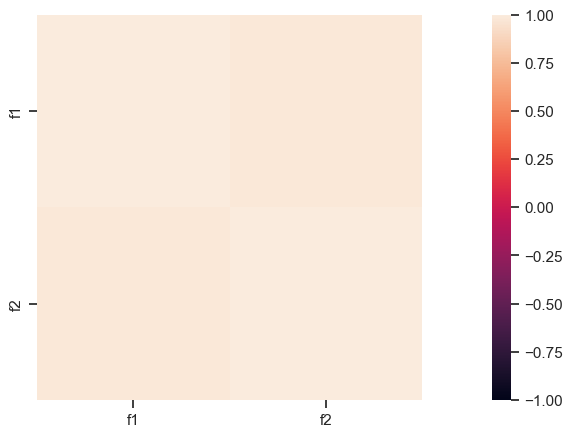

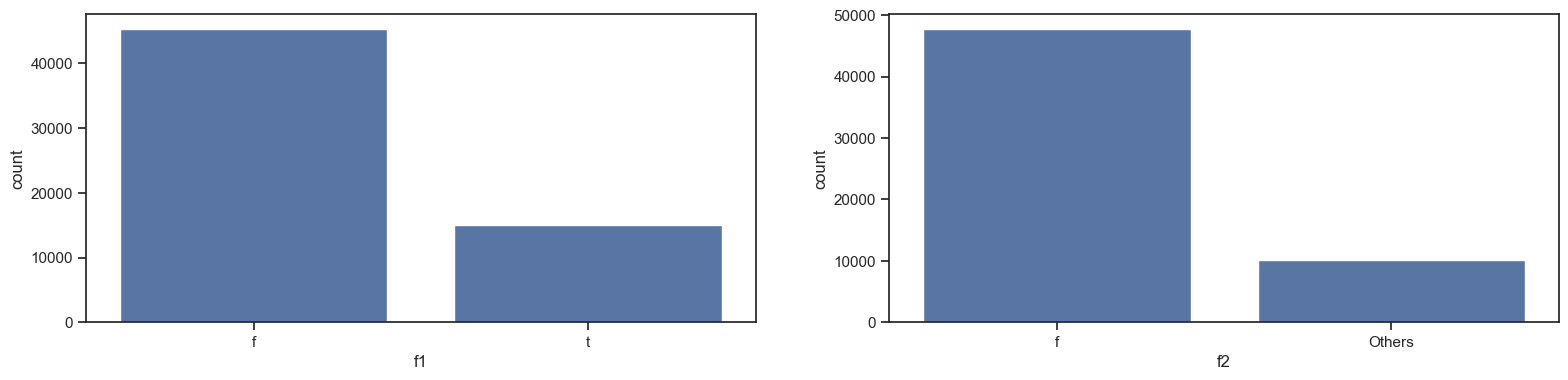

In [126]:


fig, axs = plt.pyplot.subplots(1, 1, figsize=(18,5))
corr = df_usable[group_f].phik_matrix()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, square=True, vmin= -1, vmax=1)
plt.pyplot.show()

fig, axs = plt.pyplot.subplots(1, 2, figsize=(19,4))
f_col=['f1', 'f2']
for k, c in enumerate(f_col):
    sns.countplot(data=df_usable, x=c, ax= axs[k])
    axs[k].set_xlabel(c)
plt.pyplot.show()


The two features in group f are highly correlated. The heatmap shows values close to 1. This strong relationship was already evident in the earlier bar plots. After aggregating the f2 feature, its distribution became almost identical to f1, suggesting that they originally captured similar information, with f2 providing more detailed categories. Because several categories had very few observations, we aggregated them for clarity. However, this feature is not ideal for modeling due to its unbalanced distribution. If we were to include one of them, f1 would be the better choice, as it is slightly more balanced than F2.

### 4.5 Discussion

The third stage, the EDA Pass 3, focused on relations among features and the target and correlations among features. 
First we analyzed all numerical features in relation to the target. We found out that in all numerical features high values are associated with the target value n. The feature could represent a score like education. Wo could not explain the gap between 30 and 40 in the feature a1. 
After this we did a correlation analysis of the numerical values. All correlation values were above 0.5 but not higher than 0.7. The values d1 and d2 seem valuable for prediction. a1 is correlated to d2 which could lead to redundancy. 
When we compared all categorical features in a Phi-K heatmap we could see high correlations between features of the same group. Although b, f1, and f2 looked very similar in their countplots. f1 and f2 are not correlated to b. That means we can include b without having redundancy. 

Last we looked at the correlations within groups: 
- **Group a**
	- The features in group a are not strongly correlated. So we can use all of them without having  redundancy. In EDA Pass 2 we saw that most of the categories are slightly associated to a target value, so a is not the most powerful set for prediction but still usable. 
- **Group c**
	- All features in group c are highly correlated. In EDA Pass 2 we saw all categories are associated to a target class, so we decided to keep the feature c2 with the lowest number of categories as the most valuable predictor. 
- **Group d**
	- The features in group d were not highly correlated. We saw in EDA Pass 2 that all d values provide value for predictions. Especially d4 provides most value for prediction because it has fewer values and three categories with a 100% association ot the target value (y).
- **Group f**
	- The two features in group f are highly correlated. Both features are unbalanced and not perfect for modeling, because both categories are associated with the same target value.

All in all the EDA Pass 3 gave us an overview about the relationships in among the features and the target.  

### 4.6 Decision Tree



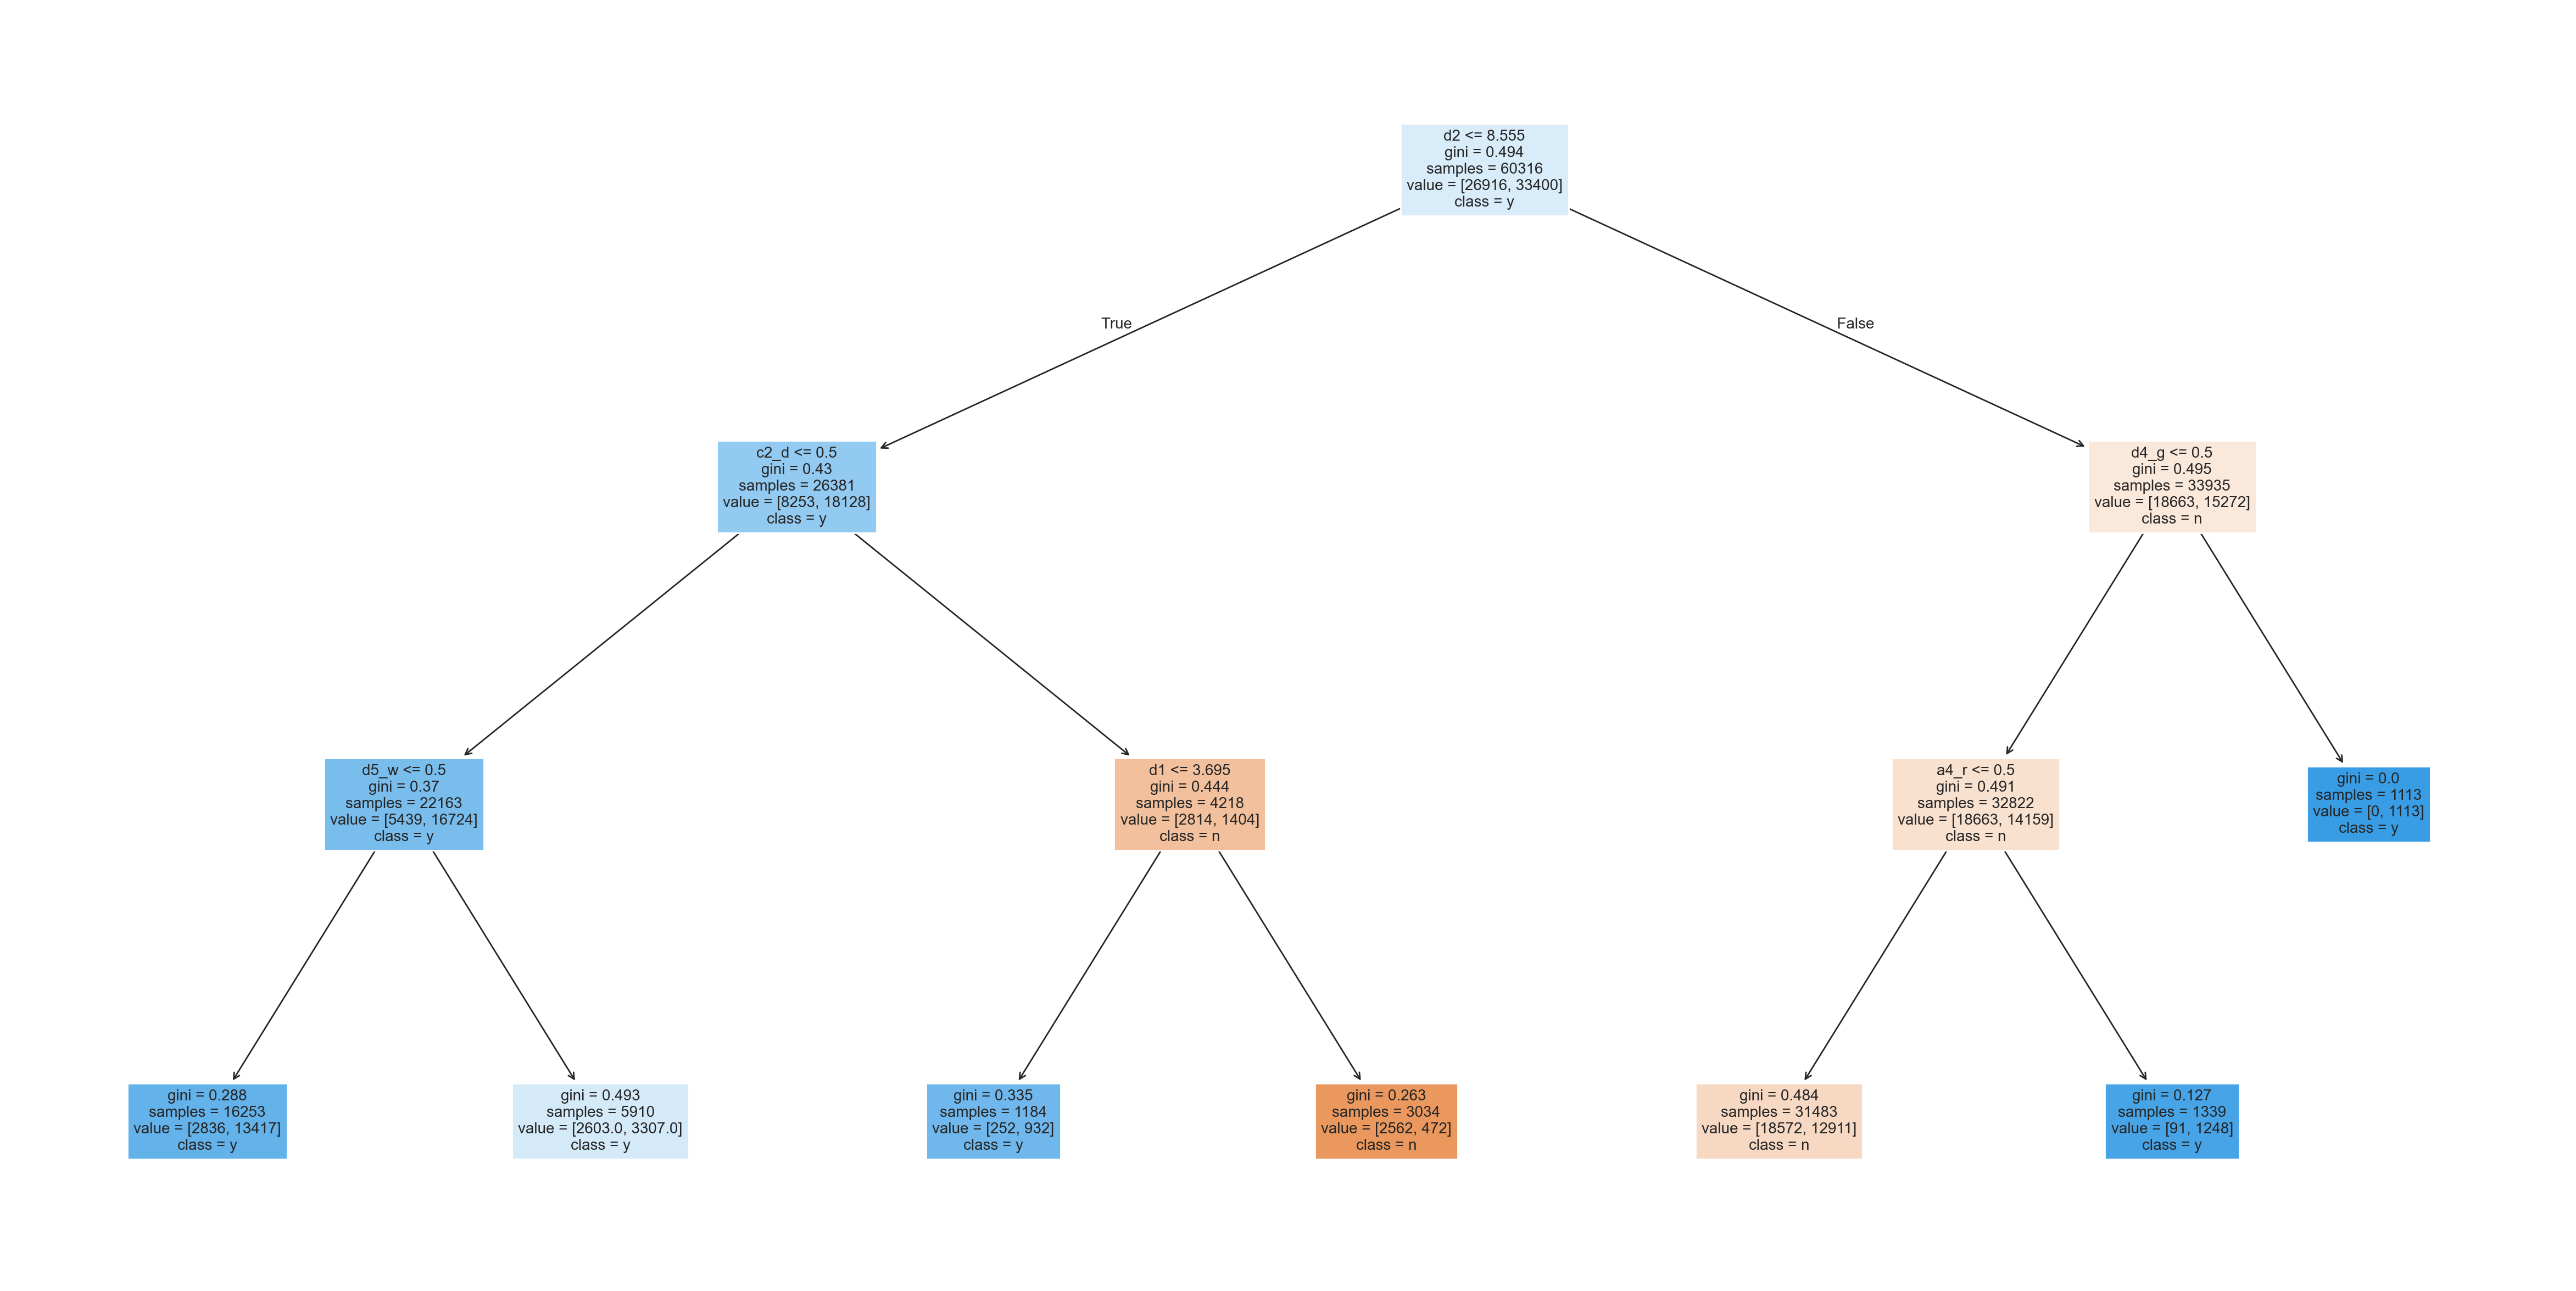

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

X = df_usable[num_usable_col + excludeTgt_cat_usable_col]
df_usable['tgt_num'] = df_usable['tgt'].apply(lambda x: 0 if x == 'n' else 1)  
y = df_usable['tgt_num']                         

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(pd.get_dummies(X), y)


plt.pyplot.figure(figsize=(30, 15), dpi=200)
tree.plot_tree(clf, feature_names=pd.get_dummies(X).columns, filled=True, class_names=['n','y'], fontsize=10)
plt.pyplot.show()


We used a decision tree to predict the target class based on various features. The tree’s first split occurs on the numerical feature d2, likely due to the high number of 0 values associated with the target class y. Subsequent splits involve the categorical features c2 and d4, which aligns with our exploratory data analysis (EDA), where we had already identified these features as strong predictors of the target value.


## 5. Insights and Interpretation 

### 5.2 Hypothesis generation

After completing the EDA, we evaluated the features based on their predictive potential for the target variable. The d and c groups were most informative. To minimize redundancy within the c features due to the high correlation, we selected c2, as it has the fewest categories.  Features a, h, and i also demonstrated useful predictive signals. But not as strong as d and c. In contrast, feature f and b offered not much information and an imbalanced distribution, making it less reliable for modeling.

### 5.3 Future data recommendation

The most informative combination of features identified from the EDA is:

Combination vector: (d4, c2, a2, i, h)

Based on this vector, the following specific category combinations are particularly useful to add to the dataset:

To predict the target value = No:
(d4.s, c2.d, a2.p, i.w, h.l)
- All these categories are associated with the target value No and have relatively few observations in the current dataset.

To predict the target value = Yes:
(d4.h, c2.f, a2.o, i.u, h.g)
-  All these categories are associated with the target value Yes and are also underrepresented.
